# R&B Lyrics Emotional Resonance Analysis
# Why I Love R&B Lyrics





When exploring why I love R&B lyrics, I can break it down into several key aspects: **emotional expression**, **language features**, **themes**, and **narrative structure**. By analyzing these dimensions, I can uncover what makes R&B lyrics so appealing to me.

---

### **1. Emotional Analysis**

R&B is known for its rich emotional depth. I want to explore whether R&B lyrics resonate with emotions I’m drawn to, such as **love, joy, or sadness**.

- **Positive Emotions**: R&B often conveys feelings of **love, romance, and trust**. By quantifying the emotional content, I can assess whether positive emotions dominate and make the genre more appealing.

- **Negative Emotions**: Lyrics that express **heartache or longing** might also evoke deep connections. These negative emotions could play a role in why I find R&B so relatable.

By comparing R&B with other genres, I can see if its emotional landscape aligns more closely with my preferences.

---

### **2. Language Features**

R&B lyrics often use **intimate and direct** language, frequently discussing topics like **relationships, love, and feelings**. To understand this better, I focus on:

- **Common Words**: Certain emotionally charged words, like "love," "heart," or "forever," might appear frequently in R&B and could be the reason I find the lyrics so engaging.

- **Word Usage**: Analyzing how positive and negative words are used in R&B lyrics versus other genres can reveal whether the language of R&B specifically aligns with what I emotionally gravitate toward.

Through language analysis, I can see if R&B lyrics create a personal connection through word choices that speak directly to me.

---

### **3. Theme Analysis**

R&B lyrics often center on a few key themes that might resonate with my experiences or interests:

- **Love and Relationships**: The primary focus in R&B is often on **love** and the emotional journey in relationships—both good and bad. This is a theme that likely strikes a chord with me.

- **Self-Reflection and Growth**: Some R&B songs dive into personal struggles and growth, which could make the lyrics feel more meaningful and reflective of my own life.

By identifying recurring themes, I can see if the content of R&B lyrics aligns with themes that hold personal significance.

---

### **4. Narrative Structure and Style**

The **narrative style** in R&B tends to be **intimate** and **personal**, often feeling like a conversation between the artist and listener. This directness might be why the genre connects with me emotionally:

- **Conversational Tone**: Many R&B songs are written in the **first person**, making the lyrics feel like they’re speaking directly to me. This creates a sense of shared experience and intimacy.

- **Straightforward Expression**: R&B tends to convey complex emotions in **simple and relatable** ways, making it easy to identify with what’s being said.

Understanding the structure of R&B lyrics can help explain how they foster a sense of closeness or familiarity, drawing me in more than other genres.

---

### **5. Keyword Network and Association Analysis**

Using **keyword networks**, I can visually map out the most frequent word combinations and associations in R&B lyrics. This analysis shows how words are connected, which might reveal why I’m drawn to certain lyrical patterns:

- **Word Pairings**: For example, frequent combinations like "love" and "heart" might evoke a strong emotional response, helping explain my preference for R&B.

- **Unique Connections**: R&B lyrics might also use distinctive word pairings that create emotional depth or a sense of intimacy, further explaining my preference.

---

### **Conclusion: What Makes R&B Lyrics So Appealing?**

Ultimately, R&B lyrics resonate with me because they evoke a deep emotional connection through **rich emotional expression, relatable language, recurring themes**, and **personalized narratives**. The way R&B lyrics communicate complex emotions with **intimacy and honesty** likely taps into my own experiences, making this genre feel both familiar and emotionally fulfilling. Through this analysis, I’ve gained a clearer understanding of why I gravitate toward R&B and how its unique qualities connect with me on a personal level.

In [1]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Activate the pandas <-> R dataframe conversion
pandas2ri.activate()

# Load the RData file
robjects.r['load']('./lyrics.RData')

# List all variables loaded from RData
r_vars = robjects.r.objects()
print("Variables in the RData file:")
print(r_vars)

# Assuming the loaded data is stored in a variable named 'lyrics' in R
lyrics = robjects.r['dt_lyrics']

# Convert the R data to a pandas DataFrame
lyrics_df = pandas2ri.rpy2py(lyrics)

# View the first few rows of the DataFrame
print("First few rows of the lyrics data:")
print(lyrics_df.head())


Variables in the RData file:
['dt_lyrics']
First few rows of the lyrics data:
                    song    year artist    genre  \
1  when-you-were-with-me  2009.0      a  Hip-Hop   
2       careless-whisper  2009.0      a  Hip-Hop   
3                   2-59  2007.0      a  Hip-Hop   
4        power-of-desire  2007.0      a  Hip-Hop   
5     you-re-not-in-love  2007.0      a  Hip-Hop   

                                              lyrics  
1  I stopped by the house we called our home\nIt ...  
2  I feel so unsure\nAs I take your hand and lead...  
3  Mark:] Sunday football I got boot off the pitc...  
4  [Chris:] Fallin' for a fantasy\nI threw away m...  
5  something in the way we touch\nyou hold my han...  


In [4]:
import pandas as pd
import pyreadr

import string
# Import nltk and download stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Step 1: Load the RData file
result = pyreadr.read_r('lyrics.RData')  # Load the RData file
lyrics_df = result['dt_lyrics']  # Extract the dataframe



# Get the default list of English stopwords
stop_words = set(stopwords.words('english'))

# Add custom stop words including common contractions like "I'm", "don't", "it's"
custom_stop_words = {'oh', 'yeah', 'la', 'uh', 'ah', 'ooh', 'na', 'yo', 'hey', 'im', 'dont', 'didnt', 'youre', 'hes', 'shes', 'theyre', 'weve', 'ive'} 
stop_words.update(custom_stop_words)  # Add custom stop words to the default list




# Step 1: Define a function to preprocess the lyrics and remove stopwords (including custom stop words and contractions)
def preprocess_lyrics(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
        words = text.split()  # Split the text into words
        words = [word for word in words if word not in stop_words]  # Remove stopwords, including custom ones and contractions
        return ' '.join(words)  # Join words back into a string
    else:
        return ""


    
# Display the first few rows of the dataset to verify the data
print(lyrics_df.head())



# Step 2: Apply the preprocessing to the 'lyrics' column for the whole dataset
lyrics_df['clean_lyrics'] = lyrics_df['lyrics'].apply(preprocess_lyrics)

# Step 3: After preprocessing, filter out R&B and other genres again (now including the 'clean_lyrics' column)
rnb_lyrics = lyrics_df[lyrics_df['genre'] == 'R&B']
other_lyrics = lyrics_df[lyrics_df['genre'] != 'R&B']

# Step 4: Verify that 'clean_lyrics' column is now present in both filtered datasets
print(rnb_lyrics[['genre', 'clean_lyrics']].head())  # Check R&B lyrics
print(other_lyrics[['genre', 'clean_lyrics']].head())  # Check other genre lyrics





[nltk_data] Downloading package stopwords to /Users/yuyao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                    song    year artist    genre  \
0  when-you-were-with-me  2009.0      a  Hip-Hop   
1       careless-whisper  2009.0      a  Hip-Hop   
2                   2-59  2007.0      a  Hip-Hop   
3        power-of-desire  2007.0      a  Hip-Hop   
4     you-re-not-in-love  2007.0      a  Hip-Hop   

                                              lyrics  
0  I stopped by the house we called our home\nIt ...  
1  I feel so unsure\nAs I take your hand and lead...  
2  Mark:] Sunday football I got boot off the pitc...  
3  [Chris:] Fallin' for a fantasy\nI threw away m...  
4  something in the way we touch\nyou hold my han...  
     genre                                       clean_lyrics
4688   R&B  always forever moment like dream somehow came ...
4689   R&B  hold wanna hold id like hold good god could ho...
4690   R&B  another year come gone love keeps perfect matt...
4691   R&B  build build let let fill cup fill cup turn lov...
4692   R&B  magic road lose control wont bless 

Next we perform ** Sentiment Analysis**. We will use **TextBlob** to sentiment analyze the lyrics of R&B songs and other genres, extract **sentiment scores**, and compare the difference in sentiment between the two.

1. **Sentiment analysis** is done by calculating the sentiment polarity (`sentiment polarity`) of the lyrics, which is a polarity score ranging from [-1, 1], where:
   - **Negative values** indicate negative sentiment.
   - **Positive values** indicate positive sentiment.
   - **0** indicates neutral sentiment.
   
2. **Compare** the mean sentiment scores of R&B and other genres to understand whether R&B lyrics tend to express more positive or negative sentiment.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=100, stop_words='english')  # Limit to top 100 words

# Step 2: Fit and transform the clean lyrics of R&B songs
rnb_tfidf_matrix = tfidf.fit_transform(rnb_lyrics['clean_lyrics'])

# Step 3: Get the feature names (i.e., the top keywords) and their corresponding scores
feature_names = tfidf.get_feature_names_out()  # Extract feature names
tfidf_scores = rnb_tfidf_matrix.toarray().sum(axis=0)  # Sum the scores of each word

# Step 4: Create a dictionary of keywords and their scores
rnb_keywords = dict(zip(feature_names, tfidf_scores))

# Step 5: Print the top 10 keywords for R&B songs
print("Top 30 R&B Keywords:")
for word, score in sorted(rnb_keywords.items(), key=lambda x: x[1], reverse=True)[:30]:
    print(f"{word}: {score:.2f}")


Top 30 R&B Keywords:
love: 272.03
baby: 215.82
know: 185.78
got: 144.52
want: 141.12
like: 134.50
time: 129.38
ill: 111.14
say: 108.51
heart: 106.47
come: 106.30
gonna: 105.67
make: 104.46
girl: 104.29
let: 103.92
way: 99.60
tell: 94.74
cause: 93.89
man: 93.23
need: 89.65
life: 86.77
right: 85.57
night: 84.26
day: 83.21
away: 80.79
thats: 80.54
feel: 79.05
aint: 77.46
wont: 76.56
think: 74.82


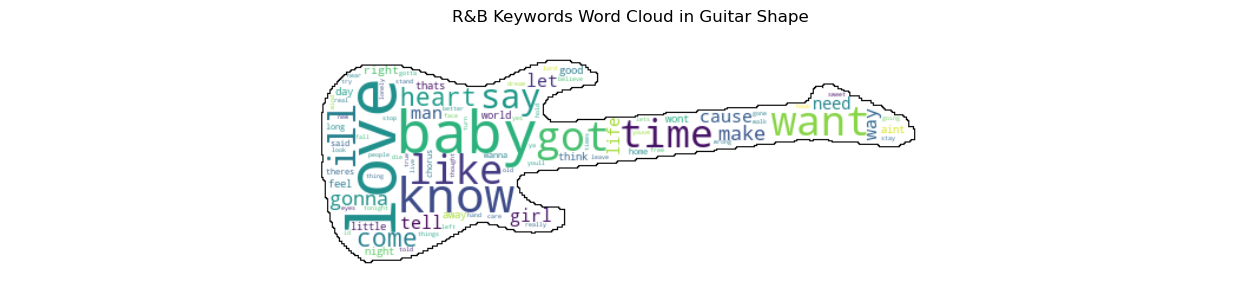

In [7]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load the guitar-shaped mask image (ensure the image is in the correct path)
guitar_mask = np.array(Image.open('/Users/yuyao/Desktop/guitar_shape.png')) 

# Step 2: Generate the word cloud with the guitar shape mask
# Increase the width and height for larger output
wordcloud = WordCloud(width=1600, height=800, background_color='white', mask=guitar_mask, 
                      contour_width=1, contour_color='black').generate_from_frequencies(rnb_keywords)

# Step 3: Plot the word cloud
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("R&B Keywords Word Cloud in Guitar Shape")
plt.show()


This word cloud shows the main keywords in **R&B songs**, with the size of the words indicating their importance or frequency in the lyrics. By analyzing the word cloud, we can get some interesting information from it:

### **Keyword Analysis**:
1. **“love”, “baby”, “know”, “want”, “like ”** These words are the biggest words in the word cloud, which means that they are very frequent in **R&B lyrics**, reflecting the themes that R&B songs often deal with:
   - **"Love ‘** and **’Baby ”** emphasize the theme of love that is common in R&B songs, especially the content of romantic relationships and intimate feelings. This is a classic form of expression in R&B.
   - **“Know”, “Want”, “Like ‘** express the expression of a certain emotion, state, or desire, further illustrating that R&B songs do not only talk about love, but also include reflection and expression of one's inner needs and feelings. 2. **’heart”, “like ”** emphasize the common theme of love in R&B songs, especially romantic relationships and intimate feelings. 3.

2. **“heart”, “time”, “life ”** These words are also more prominent, reflecting the deep connection between emotion and time in **R&B** songs; R&B often conveys emotion through the passage of time, the feelings of the heart, and the experiences of life. 3.

3. **“say”, “tell”, “got”, “make ”**: These verbs are also prominent, showing the **narrative** and **action** in R&B songs. They may reflect the singer's initiative in expressing his/her emotions, and the use of these words reflects the expression of emotions and ideas through dialog or action in the lyrics.

4. **“girl”, “right”, “night”, “come ‘**: These words also reflect the portrayal of **situations and relationships** in R&B songs, especially in nighttime (’night”) scenes, which tend to involve the portrayal of intimate relationships.

### **Emotions and Themes**:
- The vocabulary** in the word cloud focuses on emotions and themes typical of R&B music**, particularly around **love**, **emotional expression**, **desire**, and **life experiences**. Through these common vocabularies, it is evident that R&B songs focus on the expression and delivery of personal emotions.
- The combination of verbs (e.g., “want”, “tell”, “make”) and nouns (e.g., “love”, “baby”, “heart”) in the word cloud further emphasizes the strong **narrative** and **emotional impact** of **R&B music**, which often conveys complex emotions in the form of **dialogue** or **direct expression**.

### **Summary**:
1. The keywords of **R&B songs** highlight **love**, **inner feelings**, **emotional expression**, and express actions and desires through the frequent use of verbs.
2. From the word cloud diagram, we can see that R&B music is not only a statement of feelings, but also focuses on the transmission and narration of emotions, and expresses the complex emotional world through conversations with intimate objects or feelings about life.


Below, we'll complete the **Topic Modeling Map**.

We can use Python's **Latent Dirichlet Allocation (LDA)** model for topic modeling.LDA is a common topic modeling technique that extracts potential topics from text. 

### **LDA (Latent Dirichlet Allocation) Introduction**:

**LDA** is a common **topic modeling algorithm** that automatically extracts a number of hidden topics from a collection of documents.LDA discovers, given a set of documents, the different topics in those documents and computes the distribution of the different topics in each document as well as the distribution of words under each topic.

### **How LDA works**:

LDA works by assuming that each document consists of multiple topics, and each topic consists of multiple words. Specifically:
1. **Each document** can be viewed as a combination of several **topics**, but each topic has a different weight in the document (e.g., a document may be 80% related to the topic of “love” and 20% related to the topic of “life”). 2.
2. **Each theme** is composed of a number of **vocabulary**, and the probability of each vocabulary word in the theme is different (e.g., the high-frequency words under the theme of “love” may include “love”, “heart”, “bb”, “bb”, “bb”, “bb”, “bb”, “bb”, “bb”, etc.). ”, “baby”, etc.).

The key assumptions used by LDA are:
- **Each document** is a mixture of several topics.
- **Each topic** is a mixture of several words.

### **Core concepts** in the LDA model:
1. **Topics**: In LDA, topics are defined by probability distributions of words. Each topic has a specific set of words, where certain words are more representative than others.
   
2. **Probability distribution of words**: Each topic has a distribution of words where certain words have a higher probability of occurring in that topic. For example, the theme of “love” may contain high frequency words such as “love” and “heart”.

3. **Topic Distribution**: Each document has a topic distribution, which indicates the weight of a topic in the document. For example, a document may contain 80% “love” topics and 20% “life” topics. 4.

4. **Vocabulary Generation**: LDA assumes that each vocabulary is generated from a certain topic, and the LDA model inverts the vocabulary in the document to infer the topic from which the vocabulary is generated, and finally the structure of the topic is inferred.

### **How does LDA select topics? **

LDA uses a probabilistic inference approach to discover topics from documents. It does not rely on manually defined topics, but automatically “picks” the combination of words from a document that best matches the content of the document.The main steps of LDA are as follows:

1. **Initialization**:
   - LDA assumes that the number of topics to be extracted (`n_topics`, e.g. 3 topics) is defined in advance. 2.
   
2. **Repeated Reasoning**:
   - Calculate the probability that each word belongs to a topic, based on the frequency of occurrence of the word in that topic, and the weight of that topic in the current document.
   - Update the topic label for each word based on the probability.
   - Iterate repeatedly until the topic distribution and vocabulary distribution converge, i.e., there are no more significant changes.

3. **Topic generation**:
   - After several iterations, LDA outputs a topic distribution for each document and a vocabulary distribution for each topic. The most frequent words in a topic represent the core meaning of that topic.

### **How to choose the number of topics (k value)? **

1. **Manual selection**:
   - The `n_components` parameter of LDA determines how many topics the model will generate. This value can be set based on domain knowledge or experimental results. Usually, users can try different number of topics first and observe whether the distribution of keywords under each topic is reasonable.
   
2. **Model Evaluation Methods**:
   - **Perplexity**: Perplexity is a common method to evaluate LDA models. A lower perplexity indicates that the model is better at predicting the words in a document. However, perplexity is only a numerical indicator, and sometimes lower perplexity does not necessarily correspond to better topic interpretation.
   
   - **Topic Coherence**: This metric evaluates the quality of topics by measuring the semantic consistency of the most frequent words under each topic. Higher consistency indicates that the topic is easier to interpret.

  
  
3. **Observation method**:
   - After running the LDA model, you can determine whether the number of topics is reasonable by observing the generated topics and their keywords. If there is a high degree of overlap between some topics or the topics are too segmented, it means that the number of topics may be set too high.




In [8]:

from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Create a bag-of-words model (count vectorizer)
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')  # Adjust stop_words and frequency thresholds
X = vectorizer.fit_transform(lyrics_df['clean_lyrics'])  # Transform lyrics into a bag-of-words format

# Get the feature names (i.e., the words)
feature_names = vectorizer.get_feature_names_out()


In [9]:
from sklearn.decomposition import LatentDirichletAllocation

# Step 2: Set up the LDA model
n_topics = 3  # We assume there are 3 topics in R&B lyrics
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(X)

# Step 3: Extract the top words for each topic
n_top_words = 15  # Number of top words to display for each topic

# Function to display top words for each topic
def display_topics(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[topic_idx] = top_words
    return topics

topics = display_topics(lda_model, feature_names, n_top_words)


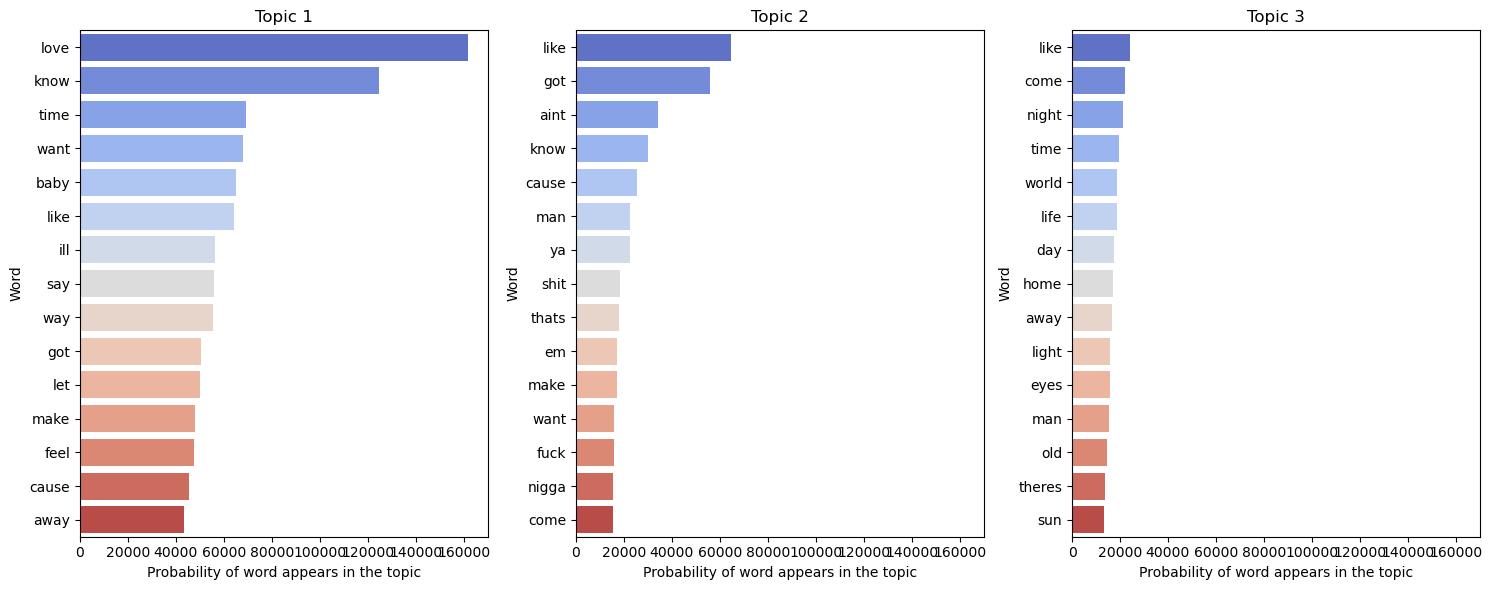

In [10]:
# Prepare data for plotting
def plot_top_words_per_topic(topics, lda_model, feature_names):
    fig, axes = plt.subplots(1, n_topics, figsize=(15, 6), sharex=True)
    
    for topic_idx, top_words in topics.items():
        # Get the word probabilities for the topic
        word_importances = lda_model.components_[topic_idx]
        top_word_importances = word_importances[word_importances.argsort()[:-n_top_words - 1:-1]]
        
        # Plot the top words and their importance
        sns.barplot(x=top_word_importances, y=top_words, ax=axes[topic_idx], palette="coolwarm")
        axes[topic_idx].set_title(f'Topic {topic_idx + 1}')
        axes[topic_idx].set_xlabel('Probability of word appears in the topic')
        axes[topic_idx].set_ylabel('Word')
    
    plt.tight_layout()
    plt.show()

# Step 4: Visualize the top words in each topic
plot_top_words_per_topic(topics, lda_model, feature_names)


This graph shows the top high-frequency words** for the **three topics obtained through **LDA topic modeling** and shows the probability of occurrence of each word in the corresponding topic. Each bar in the graph represents a topic, and the words in the graph are sorted by probability, with a higher probability indicating that the word is more important in that topic. We can use these high-frequency words to infer the meaning of each topic.

### **Topic 1 (Topic 1)**:
- **High frequency words**: `love, know, time, want, baby, like, ill, say, way, got`.
- **Analysis**:
  - The high-frequency words in this theme mainly focus on **emotional expressions**, especially words around `love', such as `baby', `want', `want', and `way'. ”, “want (want)”, “like (like)” and so on. These words are highly reflective of topics such as **love** and emotional relationships**.
  - Vocabulary words such as “know (know)” and “time (time)” may point to emotionally related **thinking** and the passage of time**.
  - Overall, this theme may be related to **love and the expression of emotions**, and is one of the common themes of a typical R&B song.

### **Theme 2 (Topic 2)**:
- **High Frequency Words**: ``like, got, aint, know, cause, man, ya, shit, thats, em``.
- **Analysis**:
  - The vocabulary of this theme shows more **colloquial** and **casual** expressions such as `aint (not)', `ya (you)', `shit (shit) ”, “em (they)” and other words. These words may reflect a more **street-oriented** or **casual conversation** style of lyrics.
  - Words such as “got (get)”, “cause (because)”, and “man (man)” suggest that the subject matter may relate to **real life**, ** self-expression** or **conversational** type content.
  - This theme may be related to **everyday life,** attitudinal expression** or more **street culture** style lyrical content.

### **Topic 3**:
- **High Frequency Words**: `like, come, night, time, world, life, day, home, away, light`.
- **Analysis**:
  - The high-frequency words in this theme demonstrate many words related to **life scenarios**, such as `night', `day', `home' ”, “life”, and “world”. These words reflect the description of **time**, **space** and **living state**.
  - Words such as “come” and “away” show an **action or change**, while “light”, “eyes” may relate to **visual perception** or **mental state**.
  - The theme may be related to **life experiences** or **reflections** that express feelings about life, the passage of time, and everyday experiences.

### **Comprehensive Analysis**:
- **Theme 1** emphasizes **love and emotions**, especially the expression of emotions around romantic relationships, in line with the classic themes of R&B music.
- **Theme 2** shows a more **spoken**, **real-life** content, possibly related to **street culture** or **expression of personality**.
- **Theme 3** focuses on **lifescenarios** that encompass time, space, and reflections and descriptions of life.


Below, we want to create a graph similar to a **Radar Chart** that we can plot using Python's **`matplotlib`** and **`seaborn`** libraries.
This graph can show the difference in emotions expressed by **R&B and Pop** music.

### **Step-by-step design**:
1. **Sentiment analysis**: we mentioned to use **`nrc lexicon`** (which is a commonly used sentiment lexicon), in Python we can use **`nltk`** or **`textblob`** for basic sentiment analysis.
2. **Data Preparation**: Sentiments need to be categorized (e.g. Anger, Happiness, Trust, etc.).
3. **Radar Charting**: the results of the analysis are plotted as a radar chart to compare the emotions of different music styles.

In [11]:


# Function to load NRC Emotion Lexicon from Wordlevel file
def load_nrc_lexicon(filepath):
    lexicon = {}
    with open(filepath, 'r') as file:
        for line in file:
            word, emotion, association = line.strip().split('\t')
            if int(association) == 1:  # Only include words associated with the emotion
                if word not in lexicon:
                    lexicon[word] = []
                lexicon[word].append(emotion)
    return lexicon

# Load the NRC lexicon (replace 'path_to_nrc_lexicon.txt' with the actual file path)
nrc_lexicon_path = '/Users/yuyao/Desktop/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'  # 替换为实际路径
emotion_lexicon = load_nrc_lexicon(nrc_lexicon_path)

# Now you can continue with the rest of the process as before


[nltk_data] Downloading package punkt to /Users/yuyao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# Function to calculate emotion counts for a given text
def get_emotions(text, emotion_lexicon):
    words = word_tokenize(text)
    emotions = Counter()
    for word in words:
        if word in emotion_lexicon:
            for emotion in emotion_lexicon[word]:
                emotions[emotion] += 1
    return emotions

# Filter only R&B songs
rnb_lyrics_df = lyrics_df[lyrics_df['genre'] == 'R&B']

# Combine all R&B lyrics into one text
rnb_lyrics = ' '.join(rnb_lyrics_df['clean_lyrics'].dropna())

# Get emotion counts for R&B genres
rnb_emotions = get_emotions(rnb_lyrics, emotion_lexicon)

# Convert the R&B emotion counts into a DataFrame for plotting
emotion_df = pd.DataFrame([rnb_emotions], index=["R&B"]).fillna(0)
emotion_df = emotion_df.T  # Transpose to make emotions as rows

# Print the emotion counts for verification
print(emotion_df)





                R&B
joy           21611
positive      29989
trust         13196
anticipation  13885
fear          12041
surprise       6632
anger          8723
disgust        6546
negative      18854
sadness       12570


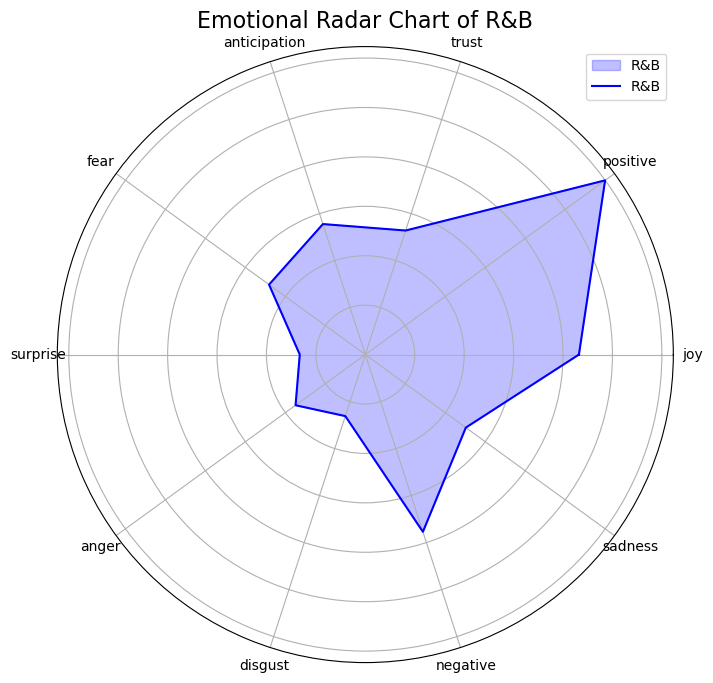

In [13]:
# Function to plot the radar chart for only R&B
def radar_chart_single(emotions, title):
    categories = list(emotions.index)
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Adjusted figure size to make the plot smaller
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))  # Smaller size
    
    # Plot for R&B only
    values = emotions['R&B'].tolist()
    values += values[:1]  # Complete the loop
    ax.fill(angles, values, alpha=0.25, color='blue', label='R&B')
    ax.plot(angles, values, color='blue', label='R&B')

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.title(title, size=16)  # You can also reduce the title size
    plt.legend(loc='upper right')
    plt.show()

# Call the function to plot the radar chart for R&B only
radar_chart_single(emotion_df, title="Emotional Radar Chart of R&B")


### **Analysis of the Emotional Distribution of R&B Music**:

This radar chart shows the distribution of R&B music across multiple emotional dimensions, including the following emotional categories:**anticipation, trust, positive, joy, sadness, negative, disgust, anger, surprise** and **fear**. anger), surprise** and **fear**.

#### **1. Positive and Joy**:
- R&B music has higher values on the **Positive** and **Joy** dimensions, indicating that R&B music expresses more positive and joyful emotions in its lyrics.
- This is in line with the R&B style, which usually focuses on positive emotions such as love, romance and happiness.

#### **2. Sadness**:
- R&B music is moderately expressive in the **Sadness** dimension. Although R&B music focuses primarily on positive emotions, it may also involve some loss, breakup, or unhappiness.
- This emotional expression may reflect the fact that R&B music often explores frustration and disappointment in love.

#### **3. Negative, Disgust and Anger**:
- The dimensions of **Negative, Disgust and Anger** have low values and are hardly significant. This indicates that R&B music rarely expresses strong negative emotions.
- This is also in line with the characteristics of R&B music, which focuses more on softer, romantic themes and less on expressing strong negative emotions such as anger or disgust.

#### **4. Trust and Anticipation**:
- R&B music has a lower distribution of **Trust** and **Anticipation**, which means that R&B songs may be more focused on the expression of current emotions than on expectations or broad trust in the future.

#### **5. Fear and Surprise**:
- **Fear** and **Surprise** are barely represented in R&B songs, suggesting that these two emotions are not the main focus of R&B songs.R&B focuses more on expressing emotions rather than expressing fear or unpredictability.

### **Summary**:
- **Positive** (**Positive** and **Joy**) is the main expression of R&B music, which is highly consistent with its romantic, soft themes.
- **Sadness** (**Sadness**) is also represented, suggesting that R&B music involves some emotional complexity, such as loss in love.
- **Negative emotions** (**Negative, Anger, Disgust**) are less frequent, and R&B is more inclined to convey positive, upbeat emotions.

Overall, R&B music lyrics focus on expressing positive and active emotions, while also involving some degree of emotional volatility (e.g., sadness).

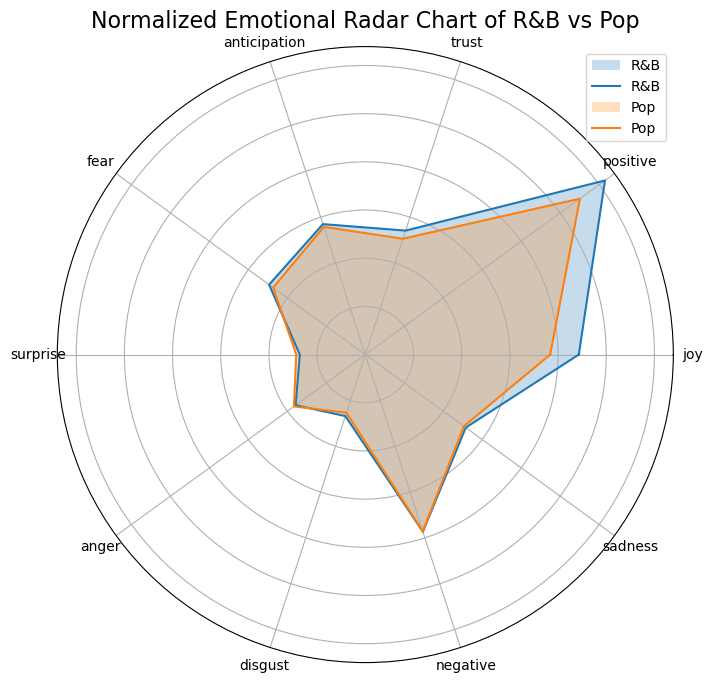

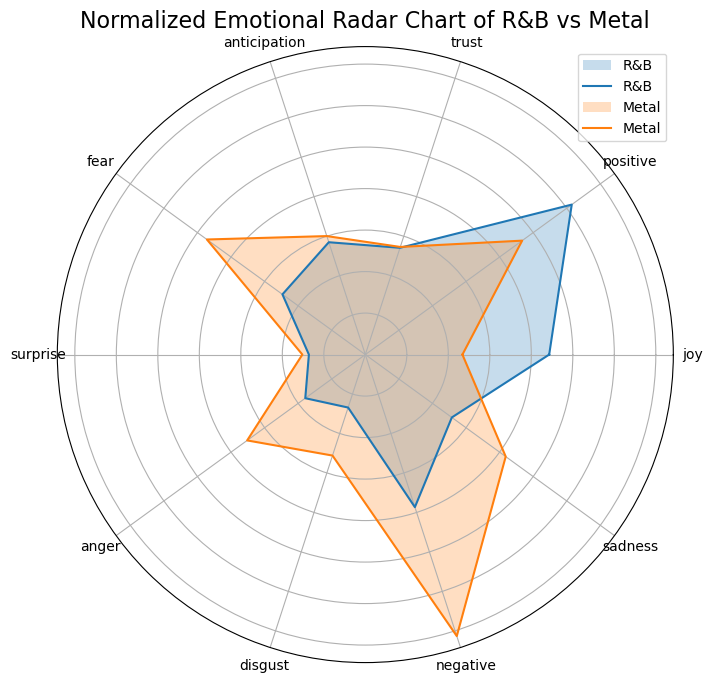

In [14]:

# Function to calculate normalized emotion counts for a given text
def get_normalized_emotions(text, emotion_lexicon):
    words = word_tokenize(text)
    emotions = Counter()
    total_words = len(words)  # Total number of words in the lyrics
    for word in words:
        if word in emotion_lexicon:
            for emotion in emotion_lexicon[word]:
                emotions[emotion] += 1
    # Normalize emotion counts by the total number of words
    for emotion in emotions:
        emotions[emotion] /= total_words
    return emotions

# Filter R&B, Pop, and Metal songs
rnb_lyrics_df = lyrics_df[lyrics_df['genre'] == 'R&B']
pop_lyrics_df = lyrics_df[lyrics_df['genre'] == 'Pop']
metal_lyrics_df = lyrics_df[lyrics_df['genre'] == 'Metal']

# Combine all R&B, Pop, and Metal lyrics into one text
rnb_lyrics = ' '.join(rnb_lyrics_df['clean_lyrics'].dropna())
pop_lyrics = ' '.join(pop_lyrics_df['clean_lyrics'].dropna())
metal_lyrics = ' '.join(metal_lyrics_df['clean_lyrics'].dropna())

# Get normalized emotion counts for R&B, Pop, and Metal genres
rnb_emotions = get_normalized_emotions(rnb_lyrics, emotion_lexicon)
pop_emotions = get_normalized_emotions(pop_lyrics, emotion_lexicon)
metal_emotions = get_normalized_emotions(metal_lyrics, emotion_lexicon)

# Create DataFrames for comparison (R&B vs Pop, R&B vs Metal)
rnb_pop_df = pd.DataFrame([rnb_emotions, pop_emotions], index=["R&B", "Pop"]).fillna(0)
rnb_metal_df = pd.DataFrame([rnb_emotions, metal_emotions], index=["R&B", "Metal"]).fillna(0)

# Transpose the DataFrames for easier plotting
rnb_pop_df = rnb_pop_df.T
rnb_metal_df = rnb_metal_df.T

# Function to plot the radar chart for comparing genres
def radar_chart(emotions, labels, title):
    categories = list(emotions.index)
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))  # Set the figure size
    
    for i, label in enumerate(labels):
        values = emotions[label].tolist()
        values += values[:1]  # Complete the loop
        ax.fill(angles, values, alpha=0.25, label=label)
        ax.plot(angles, values, label=label)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.title(title, size=16)
    plt.legend(loc='upper right')
    plt.show()

# Plot R&B vs Pop (normalized emotion counts)
radar_chart(rnb_pop_df, labels=["R&B", "Pop"], title="Normalized Emotional Radar Chart of R&B vs Pop")

# Plot R&B vs Metal (normalized emotion counts)
radar_chart(rnb_metal_df, labels=["R&B", "Metal"], title="Normalized Emotional Radar Chart of R&B vs Metal")


As can be seen from the graph, **R&B** and **Metal** differ significantly in their expression of emotions, especially in the distribution of negative and positive emotions. The following are the results of the analysis:

### 1. **Positive and Joy**:
   - **R&B** performed significantly stronger on **Positive** and **Joy** than on **Metal**. This means that **R&B** expresses more positive and happy emotions, commonly found in romantic, sensual, and love-filled lyrical themes.
   - **Metal**'s weaker performance in these areas suggests that **Metal**'s lyrics are less likely to involve the expression of happy or positive emotions.

### 2. **Negative, Sadness, Anger, and Disgust**:
   - **Metal** far outperforms **R&B** on **Negative**, **Anger** and **Disgust**. This reflects the fact that **Metal** often explores darker, angrier, or confrontational emotions that may be associated with its intense musical style and themes, such as defiance, struggle, or criticism of society.
   - **R&B**'s relatively weak performance on these negative emotions is related to the fact that **R&B** focuses more on complex emotions in romance and relationships, and does not usually express such extreme negative emotions.

### 3. **Fear and Surprise**:
   - **Metal** also expresses slightly more emotion on **Fear** and **Surprise** than **R&B**. This may be related to the fact that the musical themes of **Metal** often involve fear of the unknown or unexpected changes in emotion.
   - The relatively lower expression of **R&B** on these two emotional dimensions suggests that its musical content is less about fear or sudden emotional turns and more about the flow and expression of emotions.

### 4. **Trust** and Anticipation**:
   - **R&B** also performs slightly higher than **Metal** in terms of **Trust** and **Anticipation** (Expectation). This may be due to the fact that **R&B** songs tend to contain themes of anticipation of the future, trust building, and commitment in a relationship, whereas **Metal** lyrics are more centered around confusion and mistrust.

### Summary:
- **R&B** emphasizes on positive emotions such as **Happy**, **Positive** and **Trust** and expresses emotions more related to romance, love, and hope.
- **Metal**, on the other hand, favors the expression of negative emotions, such as **Angry**, **Disgust**, and **Fear**, and is often accompanied by confrontational and dramatic emotional expressions.
- There is a significant contrast between the two in the dimensions of emotional expression, which reflects the differences in thematic and emotional depth between the two styles of music.

Below, we plot similar sentiment changes for **R&B** music (showing positive and negative sentiment by year):

1. **Get sentiment scores** for R&B music and summarize them by year.
2. **Plot box plots** showing the distribution of **positive** and **negative** sentiment by year, respectively.

                  song                                       clean_lyrics  \
4688    always-forever  always forever moment like dream somehow came ...   
4689  i-wanna-hold-you  hold wanna hold id like hold good god could ho...   
4690     perfect-to-me  another year come gone love keeps perfect matt...   
4691       build-me-up  build build let let fill cup fill cup turn lov...   
4692        magic-road  magic road lose control wont bless soul magic ...   

      sentiment_score  
4688         0.187594  
4689         0.241667  
4690         0.240863  
4691         0.521429  
4692         0.326968  


/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_80443/3084011365.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rnb_lyrics_df['sentiment_score'] = rnb_lyrics_df['clean_lyrics'].apply(lambda x: get_sentiment_score(x) if isinstance(x, str) else 0)
/var/folders/l6/tlf60st524qbqm8kl02d9p4h0000gn/T/ipykernel_80443/3084011365.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rnb_lyrics_df_filtered['positive'] = rnb_lyrics_df_filtered['sentiment_score'].apply(lambda x: x if x > 0 else 0)
/var/f

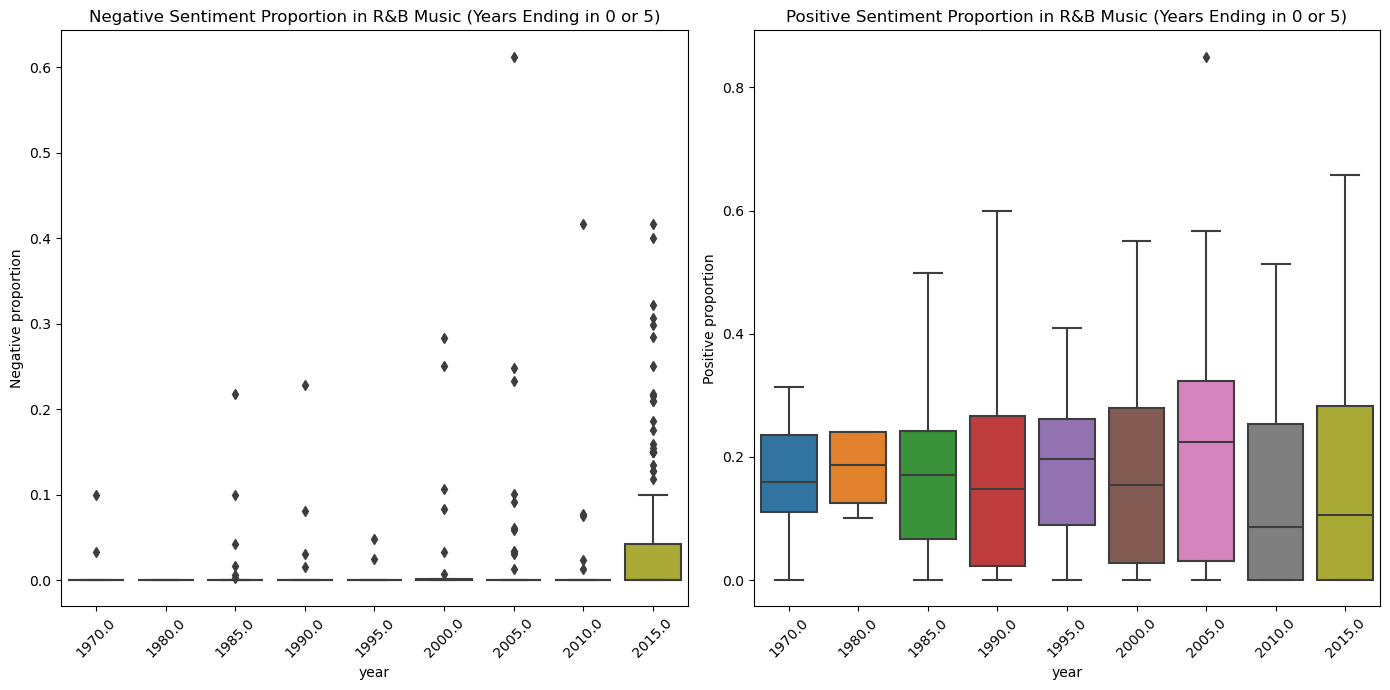

In [15]:
from textblob import TextBlob

# Step 1: 定义一个函数来计算情感极性 (polarity)
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Step 2: Apply to lyrics_df to generate sentiment_score columns
rnb_lyrics_df['sentiment_score'] = rnb_lyrics_df['clean_lyrics'].apply(lambda x: get_sentiment_score(x) if isinstance(x, str) else 0)

# Step 3: Print the first few lines to see if sentiment_score was generated correctly.
print(rnb_lyrics_df[['song', 'clean_lyrics', 'sentiment_score']].head())

# Step 1: Filter out rows with years ending in 0 or 5
rnb_lyrics_df_filtered = rnb_lyrics_df[rnb_lyrics_df['year'] % 5 == 0]

# Step 2: Generate positive and negative sentiment scores
rnb_lyrics_df_filtered['positive'] = rnb_lyrics_df_filtered['sentiment_score'].apply(lambda x: x if x > 0 else 0)
rnb_lyrics_df_filtered['negative'] = rnb_lyrics_df_filtered['sentiment_score'].apply(lambda x: -x if x <= 0 else 0)

plt.figure(figsize=(14, 7))
# Mapping negative emotions Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='year', y='negative', data=rnb_lyrics_df_filtered)  
plt.title('Negative Sentiment Proportion in R&B Music (Years Ending in 0 or 5)')
plt.xticks(rotation=45)
plt.ylabel('Negative proportion')

# Mapping positive emotions Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='year', y='positive', data=rnb_lyrics_df_filtered)
plt.title('Positive Sentiment Proportion in R&B Music (Years Ending in 0 or 5)')
plt.xticks(rotation=45)
plt.ylabel('Positive proportion')


plt.tight_layout()
plt.show()


### Change in Negative Sentiment (left graph)
- **Overall Trend**: the percentage of negativity in R&B music was lower overall between 1970 and 2015.
- **Detailed Observations**:
  - Some points of higher percentage of negative sentiment can be seen around 1985, although the percentage of negative sentiment is close to 0 in most years.
  - In 2015, there is a significant rise in negative sentiment, with some extreme values, suggesting that certain songs have stronger expressions of negative sentiment.
- **Concentration**: there are a few samples with relatively high negative sentiment in 1985 and later years, but these are outliers and not widely distributed.

### Positive sentiment change (right panel)
- **General trend**: The proportion of positive sentiment in R&B music is more consistent across years, with the median positive sentiment staying at around 0.2, but with slightly different distributions in different years.
- **Detailed Observation**:
  - In 1985, the upper and lower quartile ranges of positive sentiment are narrower, indicating a more consistent expression of positive sentiment.
  - In 1990 and 2005, the proportion of positive sentiment is more dispersed and the extreme values are higher, suggesting that positive sentiment is more strongly expressed for some R&B songs in those years.
  - Positive sentiment also remained in a higher range in 2015 despite an increase in negative sentiment, which may indicate a diversity of emotional expression.

### Conclusion:
- Prior to 1985, there were relatively few negative emotions and more concentrated displays of positive emotions.
- In 2015, emotional expression in R&B music is more diverse, with a slight increase in the proportion of negative emotions, but positive emotions still dominate.
- R&B music in general shows more positive emotions, with negative emotions fluctuating a little in specific years, but not spreading widely.


[nltk_data] Downloading package punkt to /Users/yuyao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


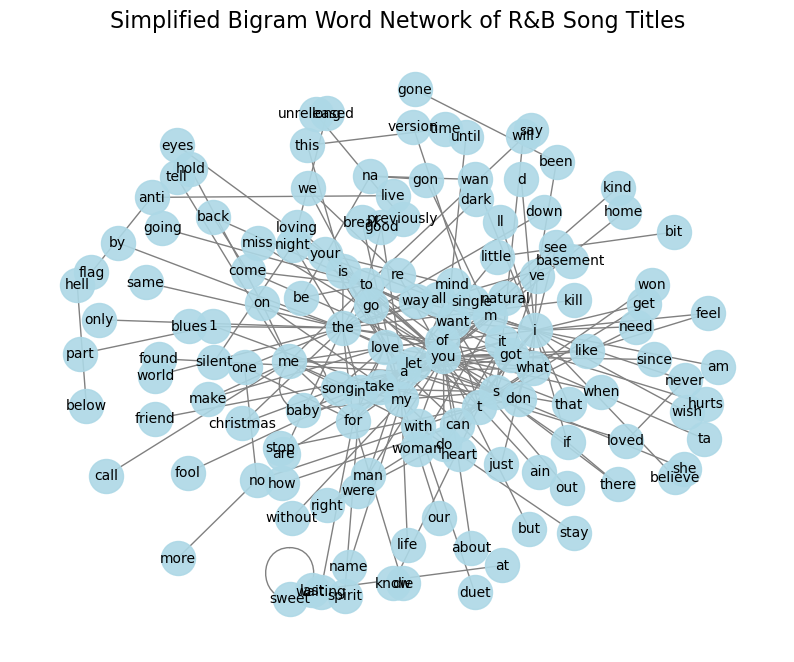

In [25]:


# Function: tag song names and create bigrams (two-word phrases)
def tokenize_and_bigrams(text):
    tokens = nltk.word_tokenize(text.lower().replace("-", " "))  # Replace hyphens and mark
    return list(ngrams(tokens, 2))  # Creating double-word phrases

# Collect all bigrams from song titles
bigrams = list(itertools.chain.from_iterable([tokenize_and_bigrams(title) for title in rnb_lyrics_df['song']]))

# Frequency of bigrams
bigram_freq = Counter(bigrams)

# Filter out bigrams with fewer occurrences (keep word pairs with occurrences greater than 3 to reduce complexity)
filtered_bigrams = {bigram: count for bigram, count in bigram_freq.items() if count > 3}

G = nx.Graph()

# Add edges from bigrams with their occurrences as weights
for (word1, word2), count in filtered_bigrams.items():
    G.add_edge(word1, word2, weight=count)

# Mapping lexical networks
plt.figure(figsize=(10, 8))  

# Use spring_layout layout and adjust k value and iteration count appropriately
pos = nx.spring_layout(G, k=0.8, iterations=50)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=600, alpha=0.9)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', width=1)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title("Simplified Bigram Word Network of R&B Song Titles", size=16)
plt.axis('off')

plt.savefig('rnb_bigram_network.png', format='png', dpi=300, bbox_inches='tight')  
plt.show()


In this network graph of two-word phrases (bigrams) of R&B song titles, we can observe the following:

1. **CENTER WORDS**: some words occupy a central position in the network graph, connecting multiple other words. For example, words like “love,” “you,” “me,” “want,” and “song” appear in multiple two-word phrases, suggesting that these words are commonly used in R&B song titles, reflecting the fact that the themes of R&B music tend to focus on expressing emotion, love, and relationships.

2. **Emotional themes**: By the way words are connected, we can see the emotional themes in R&B songs. Such words (e.g. “love”, “baby”, “heart”, “feel”, “miss”, etc.) are usually related to personal relationships and romantic feelings, which further validates the fact that R&B music is characterized by lyricism and expression of emotions.

3. **Frequency of phrases**: The edges of two-word phrases indicate the frequency of association between words. Higher frequency phrases (e.g., “love you,” “want to,” “sing for,” etc.) have thicker edges, which indicates that they appear more frequently in song titles. In contrast, sparser phrases indicate less frequent co-occurrences.

4. **Smaller sub-networks**: Some parts of the graph exhibit smaller sub-networks or “clusters” that are independent of the larger network. For example, words such as “Christmas” and “silent” form relatively isolated clusters that show a small number of theme-specific song titles.

5. **Diverse vocabulary**: The network diagrams show the diversity of vocabulary used in R&B music titles, which is not limited to expressing romance, but also includes time, place, and behavior (e.g., the use of words such as “stay,” “live,” and “right”).


For the analysis of narrative structure and expression, the narrative style in R&B lyrics can be revealed by analyzing the **narrative persona** and **language style** of the lyrics. We combine the following methods to analyze:

### **1. analyzing narrative persona** in lyrics
- **First person**: by detecting the use of **first person pronouns such as “I”, “me”, “my ”** in the lyrics, we can determine whether the lyrics are presented in a self-narrative The first person pronouns such as “I”, “me”, “my ”** can be used to determine whether the lyrics are presented in a self-narrative manner. This type of narration creates a strong sense of immersion for the listener.
  
- **Second person**: Using second person pronouns such as **“you” and “your ”**, R&B lyrics often communicate with the listener through direct dialog, conveying a sense of intimacy and interaction.

### **2. Analyzing Language Styles
- **Simple and direct expression**: analyze whether the lyrics use simple and easy-to-understand language by calculating the **average word length** and **sentence length**.
  
- **Emotional vocabulary**: the expression of the lyrics is measured by the use of emotional vocabulary. For example, the ratio of positive and negative emotion words is calculated to analyze whether the lyrics convey more happy or sad emotions.


#### **1. Analysis of Narrative Personification**

We can infer the perspective and manner of narration by analyzing the pronouns (e.g., “I”, “you”) used in the lyrics. This can help us understand whether R&B lyrics make more use of the first or second person, enhancing the emotional resonance with the listener.

#### **2. Analysis of linguistic style**

Next, we can analyze whether the language style in R&B lyrics is predominantly **simple and direct**. By calculating the average word length, sentence length, and the proportion of emotional vocabulary, we can speculate the expression style of the lyrics.

### **Interpretive analysis methods**

1. **Narrative person analysis**: We tested the proportion of first-person and second-person pronouns used in the lyrics of each song. If certain songs use more first person pronouns (e.g., “I”, “me”), it indicates that the lyrics may be predominantly self-narrative. If more second person is used (e.g., “you”), it may imply that the lyrics are more interactive with the listener.

2. **Language style analysis**: By analyzing the average word length and sentence length of lyrics, we can infer whether R&B lyrics tend to have a short, direct style of expression. Shorter words and sentences usually mean more colloquial and direct expression, which may be one of the reasons why you prefer R&B lyrics.


In [30]:
rnb_lyrics_df = lyrics_df[lyrics_df['genre'] == 'R&B'].copy()
metal_lyrics_df = lyrics_df[lyrics_df['genre'] == 'Metal'].copy()

# 1. Define functions for analyzing personal pronouns
def analyze_pronouns(lyrics):
    first_person = ['i', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours']
    second_person = ['you', 'your', 'yours']

    tokens = word_tokenize(lyrics.lower())  # Tagging the lyrics
    first_person_count = sum([1 for word in tokens if word in first_person])
    second_person_count = sum([1 for word in tokens if word in second_person])

    total_words = len(tokens)  

    # Calculate the proportion of personal pronouns in the total vocabulary
    return first_person_count / total_words, second_person_count / total_words

# 2. Calculate the proportion of first- and second-person pronouns for R&B and Metal, respectively.
rnb_lyrics_df['first_person_ratio'], rnb_lyrics_df['second_person_ratio'] = zip(*rnb_lyrics_df['lyrics'].apply(analyze_pronouns))
metal_lyrics_df['first_person_ratio'], metal_lyrics_df['second_person_ratio'] = zip(*metal_lyrics_df['lyrics'].apply(analyze_pronouns))

# 3. Analyzing linguistic style: calculating average word length and sentence length
def analyze_language_style(lyrics):
    tokens = word_tokenize(lyrics.lower())
    words = [word for word in tokens if word.isalpha()]  # 仅计算字母
    avg_word_length = sum(len(word) for word in words) / len(words)

    # Sentence splitting can be done with periods and line breaks
    sentences = nltk.sent_tokenize(lyrics)
    avg_sentence_length = len(words) / len(sentences)

    return avg_word_length, avg_sentence_length

# 4. Calculate the average word length and sentence length for R&B and Metal, respectively.
rnb_lyrics_df['avg_word_length'], rnb_lyrics_df['avg_sentence_length'] = zip(*rnb_lyrics_df['lyrics'].apply(analyze_language_style))
metal_lyrics_df['avg_word_length'], metal_lyrics_df['avg_sentence_length'] = zip(*metal_lyrics_df['lyrics'].apply(analyze_language_style))

print("R&B Lyrics Analysis:")
print(rnb_lyrics_df[['song', 'first_person_ratio', 'second_person_ratio', 'avg_word_length', 'avg_sentence_length']].head())

print("\nMetal Lyrics Analysis:")
print(metal_lyrics_df[['song', 'first_person_ratio', 'second_person_ratio', 'avg_word_length', 'avg_sentence_length']].head())


[nltk_data] Downloading package punkt to /Users/yuyao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


R&B Lyrics Analysis:
                  song  first_person_ratio  second_person_ratio  \
4688    always-forever            0.106918             0.069182   
4689  i-wanna-hold-you            0.097720             0.159609   
4690     perfect-to-me            0.123377             0.074675   
4691       build-me-up            0.104478             0.070896   
4692        magic-road            0.034211             0.055263   

      avg_word_length  avg_sentence_length  
4688         3.917241               145.00  
4689         3.292683                82.00  
4690         3.370968               248.00  
4691         3.413043                57.50  
4692         3.737003                81.75  

Metal Lyrics Analysis:
                      song  first_person_ratio  second_person_ratio  \
86  the-complete-emptiness            0.082840             0.011834   
87                the-void            0.129252             0.000000   
88             retaliation            0.095506             0.056180  

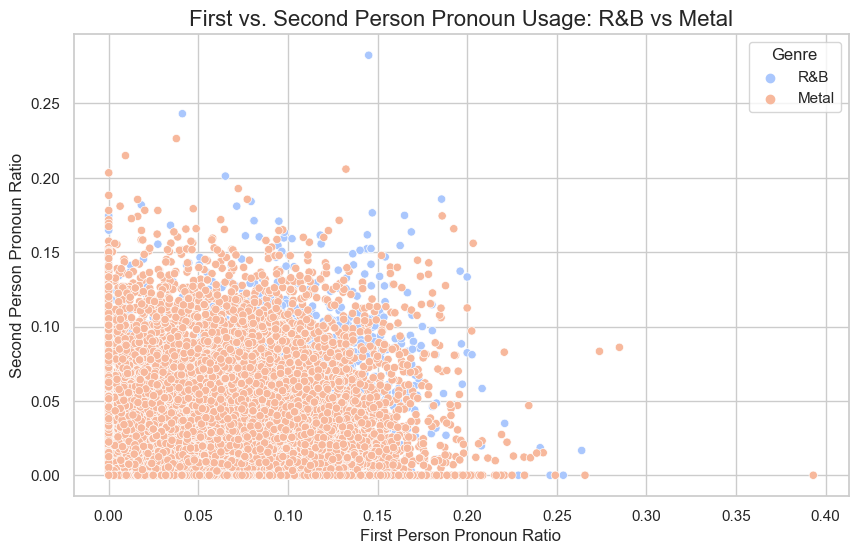

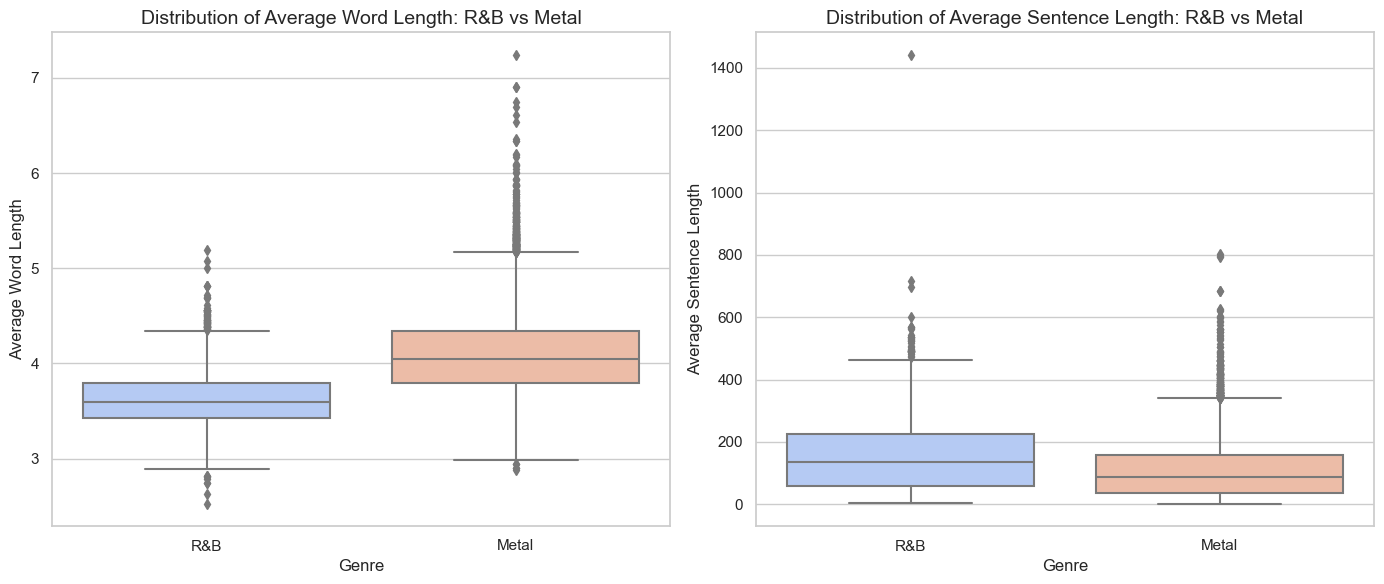

In [44]:

rnb_lyrics_df['genre'] = 'R&B'
metal_lyrics_df['genre'] = 'Metal'
combined_df = pd.concat([rnb_lyrics_df, metal_lyrics_df])

# 1. Scatterplot: comparing the proportion of first- and second-person pronouns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='first_person_ratio', y='second_person_ratio', hue='genre', data=combined_df, palette='coolwarm')
plt.title('First vs. Second Person Pronoun Usage: R&B vs Metal', size=16)
plt.xlabel('First Person Pronoun Ratio')
plt.ylabel('Second Person Pronoun Ratio')
plt.legend(title='Genre')
plt.show()

# 2. Box-and-line plot: comparing average word and sentence lengths
plt.figure(figsize=(14, 6))

# Box plots of average word length
plt.subplot(1, 2, 1)
sns.boxplot(x='genre', y='avg_word_length', data=combined_df, palette='coolwarm')
plt.title('Distribution of Average Word Length: R&B vs Metal', size=14)
plt.xlabel('Genre')
plt.ylabel('Average Word Length')

# Boxplots of average sentence length
plt.subplot(1, 2, 2)
sns.boxplot(x='genre', y='avg_sentence_length', data=combined_df, palette='coolwarm')
plt.title('Distribution of Average Sentence Length: R&B vs Metal', size=14)
plt.xlabel('Genre')
plt.ylabel('Average Sentence Length')

plt.tight_layout()
plt.show()


From the results of the scatterplot, we can see the distribution of R&B and Metal on the use of **first person** and **second person pronouns**.

### Results analysis:
1. **Overall Distribution.
   - **Metal** (orange dots) is more concentrated and mostly distributed in the low percentage area in the use of first and second person pronouns, especially in the first person percentage between 0-0.1, indicating that lyrics of Metal's music tend to use first person pronouns less often.
   - **R&B** (blue dots) is more dispersed in the proportion of first person pronouns, with some R&B lyrics having a proportion of first person usage above 0.2, or even close to 0.4. In contrast, R&B tends to use **first person** more often to express emotion.

2. **Second person pronoun:**
   - For the use of **second person pronouns** (yours, you, etc.), R&B seems to have a slightly higher percentage than Metal overall, especially in the range of 0.1-0.2 where R&B has a greater distribution of dots. r&B lyrics are usually more directly interacting with the listener or expressing a conversation, whereas Metal is more ego-centered or third person.

3. **Data Intensity:**
   - Metal's lyrics appear to be more focused, suggesting that its lyrics are more consistent in their use of **personal pronouns**. In contrast, R&B has more **diversity** in pronoun use, with a wide range of fluctuations in the use of first person pronouns in particular.

### Summary:
- The lyrics of **R&B** music seem to favor **self-expression** by conveying personal emotions and experiences through the first person pronoun “I”, while the second person pronoun “you” is also more common, probably because R&B often forms a more direct emotional connection or dialog with the listener. R&B often creates a more direct emotional connection or dialog with the listener.
- **Metal**, on the other hand, tends to use pronouns more sparingly, or to use the **third person** more often, emphasizing the **narrator** or **external events**, rather than direct personal emotion.

From these two boxplots, we can see the distribution of **R&B** and **Metal** over **mean word length** and **mean sentence length**.

### Left: Distribution of average word lengths
- The average word length of **R&B** is concentrated between **3.5 and 4.5 letters**, which indicates that R&B lyrics usually use simpler vocabulary and shorter word lengths. R&B lyrics emphasize on rhythmic and emotional expression, and may therefore use simpler and more direct words.
- The average word length of **Metal** is slightly longer, ranging from **4 to 5.5 letters**, with some lyrics using words longer than 6 letters.Metal's lyrics tend to deal with complex themes and narratives, which may result in the use of more long words.

### Right: average sentence length distribution
- **The average sentence length of R&B** is relatively short, usually between **100 and 300 characters**, with a high concentration, indicating that R&B lyrics have shorter and more concise sentences. This is consistent with the style of R&B music, where lyrics are usually concise and direct, focusing on conveying emotion and listener interaction.
- The average sentence length of **Metal** is significantly longer, usually between **200 and 500 characters**, and there are even some lyrics with sentence lengths of more than 600 characters.The lyrics of Metal music tend to have a complex narrative structure and are rich in content, resulting in longer sentence lengths and more complex vocabulary.

### Summary:
- **R&B** lyrics usually use shorter vocabulary and short sentences, emphasizing direct expression of emotion and rhythm.
- **Metal** lyrics are more inclined to use longer vocabulary and complex sentence structures, suggesting that Metal music is more complex in terms of lyrical content and deals with deeper and more varied themes.

My preference for **R&B** and my estrangement from **Metal** can be explained in a number of ways from the results of my previous analyses and visualizations, which revealed significant differences between the two styles of music in terms of emotional expression, lyrical structure, and narrative style.

### 1. **Differences in Emotional Expression:**
- **R&B** music shows more **positive emotions** such as **joy**, **trust**, and **love** on the emotional radar chart, while being lower on negative emotions such as **angry** and **disgust**. This suggests that R&B music conveys more warm and intimate emotions. Positive expressions of emotion may make you feel more empathetic, and R&B music can provide emotional comfort and fulfillment through soft melodies and emotionally rich lyrics.
- In contrast, **Metal** music shows more **angry**, **fear** and **disgust**, and these negative expressions of emotion may make you feel depressed, uncomfortable, or alienated from it. metal's intense style and its emotionally volatile lyrics may make you feel overwhelmed.

### 2. **Simplicity and complexity of lyrical structure:**
- **R&B** lyrics tend to be **short** and **direct**, with more use of **first person pronouns** (e.g., “I”) and **second person pronouns** (e.g., “you”), suggesting that R&B songs are largely **direct expressions** of personal emotions***. *R&B songs are largely a direct expression of personal feelings** and create an emotional dialog with the listener.R&B lyrics often revolve around themes such as **love**, **relationships**, and **living emotions**, which may resonate with you more than anything else.
- **Metal** music has a relatively complex lyrical structure, **longer sentence lengths** and uses more advanced and abstract vocabulary, which may deal with themes such as **social issues**, **personal internal struggles** or even **darkness** and **fantasy**. For those who favor direct emotional expression, this complex and profound narrative style of Metal may seem too heavy and difficult to comprehend.

### 3. **Narrative perspective and listener interaction:**
- The use of more **second person pronouns** (e.g. “you”) in **R&B** music means that R&B music often tries to form a more direct emotional connection with the listener, with the lyrics seeming to speak to you. This feeling of **Listener Interaction** may make it easier for you to become invested in the music, as if you were part of the story.
- Whereas **Metal** music tends to use **third person** or less direct interaction, it tends to narrate from a narrator or external point of view, and there is a certain distance between the music and the lyrics, which may make you feel unable to be fully emotionally involved.

### 4. **Affinity of language styles:**
- **R&B** uses shorter words and more concise sentences in its lyrics,** and the average word length and sentence length** are lower than that of Metal music. Short and direct expressions make R&B lyrics more relatable and understandable, allowing people to quickly get into the mood and enjoy the emotional experience that the music brings.
- Metal lyrics, due to their longer sentences and complex language structure, may give you a sense of “burden” and require more time to understand the deeper meaning and emotion of the lyrics.


### Summary:
In conclusion, I prefer **R&B** because it is able to express warmth and intimacy through concise and direct lyrics, creating an emotional interaction with the listener. Whereas, my dislike of **Metal** may be due to its complex narrative, less emotional interaction, and more intense expression of negative emotions, styles that you find difficult to accept or resonate with.The emotional softness of R&B, the intimacy of the narrative, and the warm tone of the music itself are more in line with your aesthetic and emotional needs.

Below, we want to complete the **Keyword Network and Association Analysis**, which can be done in steps from simple to complex.
The goal of the design is to help understand the structure and themes of R&B lyrics by analyzing the keywords in the lyrics and constructing associations between them.

### Step-by-step design (simple to complex):

---

### **Step 1: Keyword Extraction and Frequency Analysis**
**Objective:** Extract the most common keywords in the lyrics and perform frequency analysis.
- **Input:** Preprocessed lyrics data `clean_lyrics` column.
- **Methodology:** 
  - Identify the most common words in the lyrics by word frequency counting.
  - Use `CountVectorizer` or `TfidfVectorizer` to count the frequency or TF-IDF value of words.
- **Output:** 
  - A word frequency chart (bar chart or word cloud) showing the top n commonly used words.
  - Tip: You can remove emotional high-frequency words such as “love”, “baby”, etc., and keep specific keywords for focused analysis.

--- --- --- --- --- --- --- --- --- --- --- ---

### **Step 2: Word Pairs (Bigrams) Networks** **Objective: **Construct a network of word pairs (Bigrams).
**Objective:** Construct a network of binary word pairs (bigrams).
- **Input:** Pre-processed lyrics text.
- **Methodology:**
  - Using n-gram technique, binary phrases (bigrams), i.e., pairs of two neighboring words, are generated for each song.
  - The binary phrases of all the lyrics are counted and the most common word pairs are selected.
  - A network graph is constructed, where nodes represent words, edges represent their neighboring occurrences, and the thickness of the edges can indicate the frequency of occurrences.
- **Output: ** 
  - Simple **Word pair network** graph showing common word associations in R&B lyrics.
  - Preliminary word association analysis: which words always appear together? Common R&B themes that may be revealed behind these word pairs.

---

### **Step 3: Associations of Keyword Themes**
**Objective:** Extend the network of binary word pairs to generate a complex multi-level word association network.
- **Input:** Extracted common words and their associations.
- **Methodology:**
  - Construct more complex word associations based on binary phrases. For example, by `trigram` (ternary phrase) or by building a “semantic network” of certain keywords.
  - Word pairs are not limited to two neighboring words, but are more broadly related based on the context of the words.
  - Using a natural language processing tool such as `Word2Vec`, the semantic similarity between words is calculated and a complex lexical network is constructed based on the similarity.
- **Output:**
  - A more complex lexical network showing how words in R&B lyrics are related to each other and the emotional themes they represent.
  - Different sub-themes: whether certain words are always associated together in R&B lyrics to form specific emotional themes (e.g. “love” vs. “sadness”).

---

### **Step 4: Combining Emotions and Themes**
**Objective:** Combine keyword association with sentiment analysis for network analysis of sentiment themes.
- **Input:** The complex lexical network generated in Step 3.
- **Methodology:**
  - Add sentiment analysis (e.g., positive, negative sentiment, specific sentiment categories) to the lexical network to explore associations between different sentiment themes.
  - Each node represents a sentiment-related word, and each edge represents a word-to-word semantic or sentiment association.
  - The color or node size can represent sentiment intensity, word frequency, or sentiment polarity.
- **Output:**
  - **Emotion Network Graph**: demonstrates the interconnection of different emotion themes in R&B lyrics through emotion categorization of keywords. Allows exploration of how positive and negative emotions are intertwined in R&B lyrics.

---

[nltk_data] Downloading package punkt to /Users/yuyao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


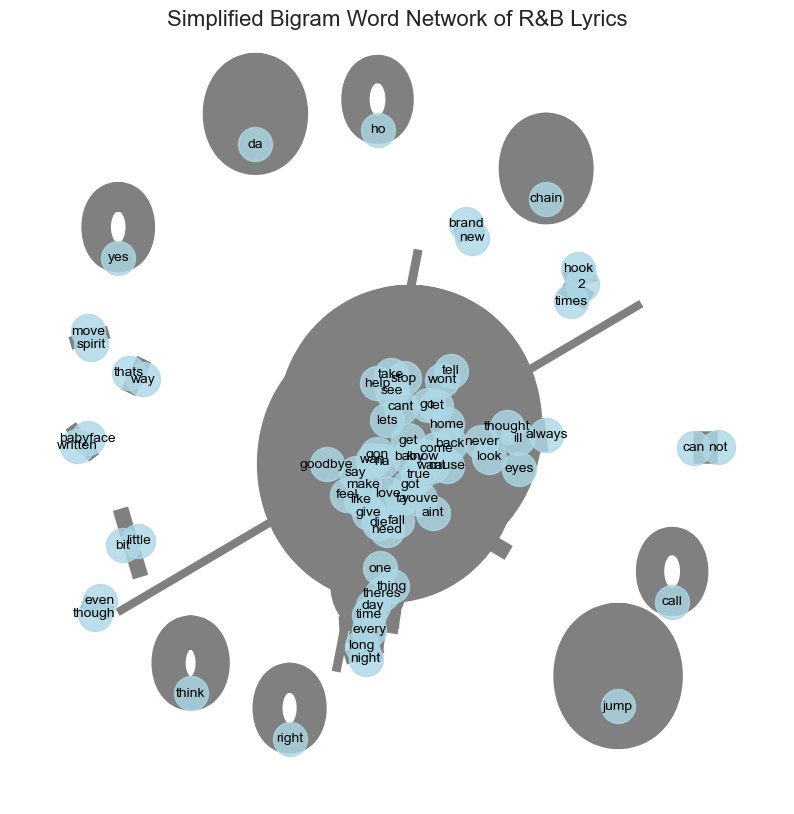

In [35]:

# 1. Extract binary words (bigrams) and count the word frequency
def extract_bigrams(text):
    tokens = nltk.word_tokenize(text.lower()) # split text into words
    bigrams = list(ngrams(tokens, 2)) # extract binary phrases
    return bigrams

# 2. Binary phrase extraction on R&B lyrics dataset
rnb_bigrams = list(itertools.chain.from_iterable(rnb_lyrics_df['clean_lyrics'].dropna().apply(extract_bigrams))))

# 3. count the frequency of occurrence of each binary phrase
bigram_freq = Counter(rnb_bigrams)

# 4. filter low-frequency word pairs by setting a frequency threshold, say 3
filtered_bigrams = {bigram: count for bigram, count in bigram_freq.items() if count >= 3}

# 5. Keep only the top 100 most frequent word pairs
top_100_bigrams = dict(sorted(filtered_bigrams.items(), key=lambda item: item[1], reverse=True)[:100])

# 6. Construct a graph of word pairs (Graph)
G = nx.Graph()

# 7. add edges to each binary word pair, with the edges weighted by the number of occurrences of the word pair
for (word1, word2), count in top_100_bigrams.items():
    G.add_edge(word1, word2, weight=count)

# 8. Visualize the network diagram
plt.figure(figuresize=(10, 10))

# Use spring layout to layout the graph
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the nodes, node size is adjusted according to the number of connections
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=600, alpha=0.8)

# draw edges, width of edges adjusted according to weight (word frequency)


nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', width=[G[u][v]['weight']*0.3 for u,v in G.edges()])


nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', font_color='black')

plt.title("Simplified Bigram Word Network of R&B Lyrics", size=16)
plt.axis('off')  
plt.show()




### 1. **Clusters of word groups**
   - **Center Cluster:** There is a larger cluster in the center portion of the graph that includes the words “love”, “feel”, “make”, “give”, “home”, “night”, “need”, and “want”. This suggests that these words are often grouped together in R&B lyrics and may be themes related to love, emotion, desire, etc., in keeping with the emotional themes usually expressed in R&B music.
   - **Dispersed clusters:** Around the graph, there are small isolated clusters such as “babyface” and “written”, “move” and “spirit”, “think” and “right”, etc. These clusters may appear in specific lyrics, but less frequently, or they may indicate some more isolated emotion or behavior.

### 2. **Isolated word pairs**
   - There are some word pairs that appear to be relatively isolated, such as “jump”, “call”, “can not” These phrases are not connected to the main cluster at the center, meaning that they appear less frequently in the main emotional cues, and may represent separate or specific narratives in the lyrics.

### 3. **Popular phrases**
   - Some of the words in the central cluster (“love”, “feel”, “need”, “give”) are typical of the vocabulary of R&B lyrics, reflecting the fact that the themes of R&B music tend to revolve around love, feelings, and emotional expression.
   - Words similar to “can't”, “won't”, “tell”, and “help” that express emotional conflict or struggle also appear in the center cluster, suggesting that R&B not only expresses positive emotions, but also often deals with negative or complex emotional situations.

### 4. **Graph Distribution**
   - Although the layout of the graph shows a more even distribution of nodes, there are still noticeable clusters, which show that R&B lyrics have a high frequency of word combinations on certain topics.
   - Larger nodes in the graph (e.g., “love”, “feel”) indicate their high frequency of use in the lyrics, and the thickness of the edges reflects how often these word combinations occur. Thicker edges, such as “make-love”, “feel-need”, indicate that they are paired more frequently.

### 5. **Conclusion**
   - The phrase network map reveals common themes and emotional expressions in R&B lyrics, with words around love and emotion taking center stage in the network in particular. This also explains why you might like R&B: R&B lyrics typically convey strong emotions, especially deep emotional conflict and reconciliation related to love and relationships. These emotional words and pairings reflect the emotional tension and resonance of the music, in keeping with the appealing qualities of R&B music.

### **Constructing keyword associations**

Now that we have constructed the basic keyword network graph, we need to go further and deeper to analyze the associative relationships between these keywords. The goal is to find out the semantic associations and potential expressions of the topic through the common frequency of occurrence between the keywords.


1. **Keyword Association Matrix:**
   - A correlation matrix is constructed using bigrams (binary phrases) showing the frequency of co-occurrence of each keyword pair.
   - This matrix will help us quantify the strength of the relationship between different keywords, the more frequently co-occurring pairs of words are associated more strongly.

2. **Weighted correlation network:**
   - A weighted network graph is constructed from the association matrix, where the nodes represent the keywords and the weights of the edges represent the frequency of their co-occurrence.
   - In this way, we can show more accurately which words are closely linked together and which are isolated or less frequently associated.

3. **Keyword community detection:**
   - Use community detection algorithms (e.g. Louvain's algorithm) to discover clusters of keywords from the web.
   - With this step, we can identify clusters of words with potential themes or sentiment expressions.

4. **Network visualization and interpretation:**
   - Visualize these associations in a graph, and colorize and label them according to the results of community detection to facilitate the observation of which words belong to the same theme.
   - Ultimately, the association matrix and visualization results are combined to explain the semantic associations between keywords, exploring why these words frequently co-occur and how they affect the emotional conveyance of R&B lyrics.


[nltk_data] Downloading package punkt to /Users/yuyao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/yuyao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


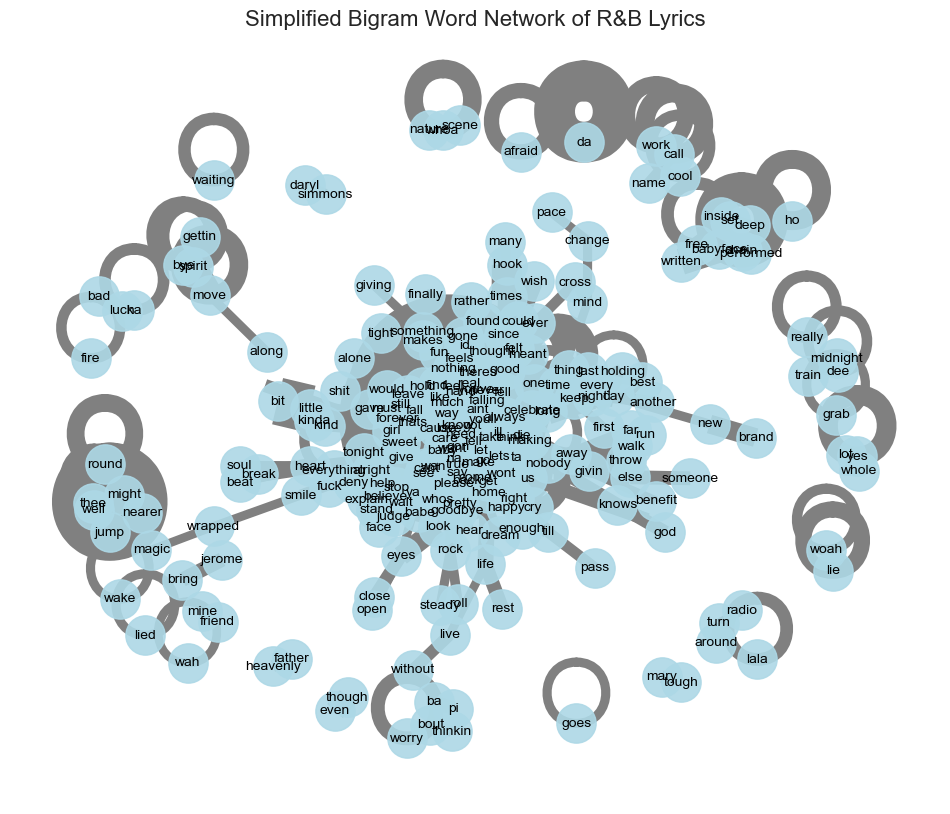

In [74]:

stop_words = set(stopwords.words('english'))

# Tokenize the lyrics and create bigrams (excluding stopwords)
def tokenize_and_bigrams(text):
    tokens = [word for word in nltk.word_tokenize(text.lower().replace("-", " ")) if word.isalpha() and word not in stop_words]
    return list(ngrams(tokens, 2))  # Create bigrams

# Collect all bigrams from the lyrics
bigrams = list(itertools.chain.from_iterable([tokenize_and_bigrams(lyrics) for lyrics in rnb_lyrics_df['clean_lyrics']]))

# Count frequency of bigrams
bigram_freq = Counter(bigrams)

# Filter out low-frequency bigrams (only keep those that appear more than a certain number of times)
threshold = 30 # Only keep bigrams that appear more than 20 times
filtered_bigrams = {bigram: count for bigram, count in bigram_freq.items() if count > threshold}

# Create the graph
G = nx.Graph()

# Add edges with weights from the filtered bigrams
for (word1, word2), count in filtered_bigrams.items():
    G.add_edge(word1, word2, weight=count)

# Plot the word network using matplotlib
plt.figure(figsize=(12, 10))

# Define the layout of the graph
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw nodes and edges with sizes based on degree and edge weights
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800, alpha=0.9)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', width=[G[u][v]['weight']*0.2 for u, v in G.edges()])
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title("Simplified Bigram Word Network of R&B Lyrics", size=16)
plt.axis('off')  # Turn off the axis
plt.show()


This word association network diagram shows how words in R&B lyrics are related to each other. By removing deactivated words and high-frequency meaningless words, we can see more clearly the words that are commonly found in lyrics and the connections between them.

### Key observations:
1. **Aggregation of central vocabulary**:
   - The center part of the vocabulary is dense, such as “love”, “you”, “want”, “heart “ etc. These words are very common emotional expressions in R&B music, emphasizing the need for love, emotional fluctuations and intimacy. This is also closely related to the theme of romance and emotional entanglement that has always characterized R&B music.
   - This is further supported by other common emotional vocabulary such as “feel”, “give” and “hold”.

2. **Isolated groups on the periphery**:
   - The periphery of the graph is characterized by more isolated groups or pairs of words, such as “chain”, “jump”, “fire”, ” nature”, etc. They are less associated with the central section, but may appear in specific types of R&B songs or in specific scenes to express more personalized or abstract emotions and experiences.

3. **Vocabulary diversity**:
   - The vocabulary network demonstrates that R&B lyrics contain not only emotional vocabulary, but also vocabulary that is common in everyday life (e.g., “night,” “baby,” “time,” etc.). time”, etc.). This shows that R&B music not only focuses on romance and love, but also involves all aspects of life, reflecting listeners' daily emotional experiences.
   
4. **Strong and weak relationships between words**:
   - The thickness of the edges represents the strength of the association between words. For example, thicker edges show pairs of words that appear together more frequently, indicating that these words are more closely semantically related in R&B lyrics. For example, the stronger association between “you” and “love” reflects the centrality of emotion and intimacy in R&B lyrics.

  

**Contrastive Analysis**:
- The uniqueness of R&B lyrics in terms of emotional expression was further analyzed by comparing them with lexical correlation charts of other music styles, such as metal music.

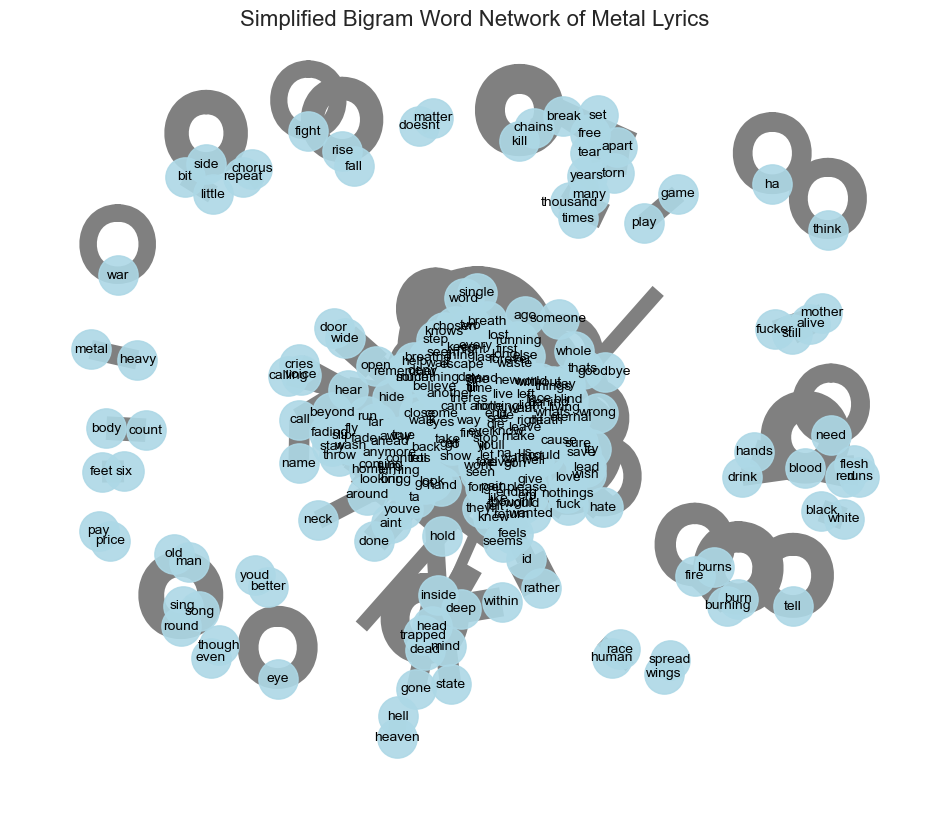

In [73]:
# Collect all bigrams from the metal lyrics
metal_bigrams = list(itertools.chain.from_iterable([tokenize_and_bigrams(lyrics) for lyrics in metal_lyrics_df['clean_lyrics']]))

# Count frequency of bigrams
metal_bigram_freq = Counter(metal_bigrams)

# Filter out low-frequency bigrams (only keep those that appear more than a certain number of times)
metal_threshold = 60  # Only keep bigrams that appear more than 60 times
metal_filtered_bigrams = {bigram: count for bigram, count in metal_bigram_freq.items() if count > metal_threshold}

# Create the graph
metal_G = nx.Graph()

# Add edges with weights from the filtered bigrams
for (word1, word2), count in metal_filtered_bigrams.items():
    metal_G.add_edge(word1, word2, weight=count)

# Plot the word network using matplotlib
plt.figure(figsize=(12, 10))

# Define the layout of the graph
metal_pos = nx.spring_layout(metal_G, k=0.5, iterations=50)

# Draw nodes and edges with sizes based on degree and edge weights
nx.draw_networkx_nodes(metal_G, metal_pos, node_color='lightblue', node_size=800, alpha=0.9)
nx.draw_networkx_edges(metal_G, metal_pos, edgelist=metal_G.edges(), edge_color='gray', width=[metal_G[u][v]['weight']*0.2 for u, v in metal_G.edges()])
nx.draw_networkx_labels(metal_G, metal_pos, font_size=10, font_color='black')

plt.title("Simplified Bigram Word Network of Metal Lyrics", size=16)
plt.axis('off')  # Turn off the axis
plt.show()





This vocabulary network map shows keywords and their associations in **Metal music lyrics**. Compared to the previous **R&B** lyrics network, this map shows the significant differences in vocabulary and unique thematic expressions of Metal songs. Below are a few key points of analysis derived from the lexical association graph:

### 1. **Differences in Themes and Emotional Expressions**:
   - Some common words in Metal lyrics such as **"war ‘**, **’kill ‘**, **’chains ‘**, **’blood ‘**, **’pain ‘**, **’fight ‘**, and **’burn ”** show that Metal music is more centered around strong emotions such as pain, violence, conflict and anger. These words reflect common narrative themes in Metal music such as rebellion, war, death and darkness.
   - In contrast to **R&B**, Metal lyrics are more focused on expressing negative emotions such as pain, hatred, violence and loneliness. This is also reflected in the network graph, with a higher concentration of negative words and dense node associations.

### 2. **Structure of narrative content**:
   - The narrative structure of Metal lyrics is much more ambitious, filled with macro themes such as war, death, and chaos. Through words such as **"chains ‘**, **’burning ‘**, **’trapped ”**, etc., it can be seen that Metal music often involves dilemmas and feelings of powerlessness, and expresses the confrontation with the external world or inner pain. This contrasts with **R&B**, which is more concerned with themes of love, emotional expression and intimacy.
   - Metal's lyrics have a more decentralized vocabulary network, meaning that they are more broadly expressed and deal with more expansive themes. Nodes like **"kill ‘** and **’war ‘** show the darker moods that are more common in Metal, while associations between words like **’blood ‘** and **’chains ”** depict feelings of distress and violence.

### 3. **Visual Distribution and Emotional Center of Gravity**:
   - The central words in the graph such as **"kill ‘**, **’blood ‘**, and **’fight ”** not only strongly correlate with the other negative emotional words around them, but also their high frequency of occurrence suggests the importance of these themes in Metal's music.
   - Vocabulary words such as **"hate ‘** and **’burn ”** also reflect the fact that Metal music often contains feelings of anger and revenge. In contrast to the emotional vocabulary of **R&B** (e.g. love, intimacy, etc.), Metal favors violence and extreme emotions.

### 4. **Contrast R&B**:
   - **R&B** Music's network graph focuses more on words related to emotional expression, such as love, intimacy, feelings, etc. Overall, R&B's emotional gravity is skewed towards positive and softer emotions.
   - **Metal**, on the other hand, displays stronger, darker emotions, often exploring inner pain and outer conflict in its lyrics, in stark contrast to R&B.

### Summary:
The word association diagrams in Metal music lyrics demonstrate its strong negative emotions, such as war, killing and pain, which are in line with the intensity and darkness of its music style. In contrast to R&B music, Metal shows more anger and rebellion in its lyrics.





Our goal is to analyze the **connection strength between words** in R&B lyrics, focusing on which words play a central role by examining their **node centrality**.

### Design:
1. **Calculate Node Centrality**:
   - **Degree Centrality** measures how often a word connects to others, showing the most frequently used and connected words.
   - **Eigenvector Centrality** identifies influential words in the network, not only based on the number of connections but also on connections to other influential words.

2. **Visualize Centrality**:
   - Use **node size** to represent degree centrality and **node color** to represent eigenvector centrality, highlighting the most central words.



### Steps:

1. **Calculate Degree Centrality**:
   - Shows how many direct connections each word has, highlighting frequently used words.

2. **Calculate Eigenvector Centrality**:
   - This measures a word's influence by considering its connections to other important words.

3. **Plot the Graph**:
   - Node size reflects degree centrality, while color depth shows eigenvector centrality, making central words visually stand out.


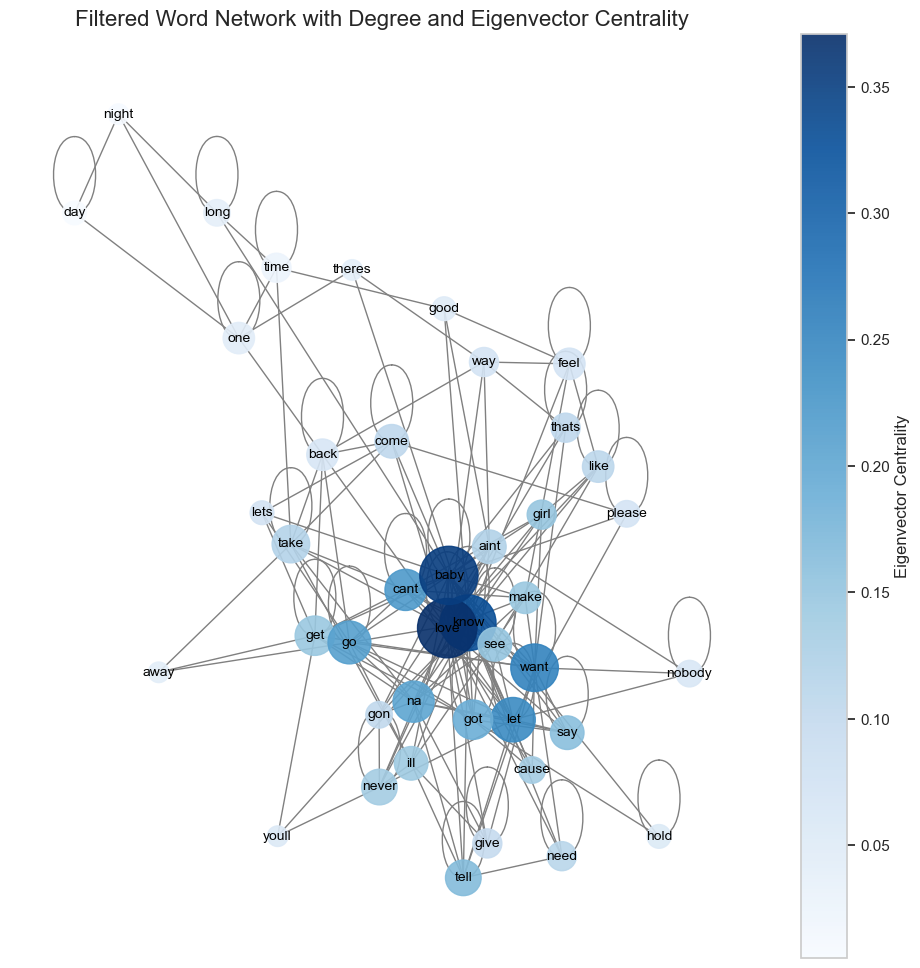

In [76]:

# Filter low-frequency nodes (threshold can be set based on degree centrality or other metrics)
threshold_degree = 0.02 # Set the degree centrality threshold and remove nodes below it
filtered_nodes = {node: degree for node, degree in nx.degree_centrality(G).items() if degree > threshold_degree}
filtered_G = G.subgraph(filtered_nodes)

# 1. Calculate the degree centrality and eigenvector centrality of the filtered nodes
degree_centrality = nx.degree_centrality(filtered_G) # degree_centrality
eigenvector_centrality = nx.eigenvector_centrality(filtered_G) # eigenvector centrality

# 2. Set the size and color of the node, based on degree centrality and eigenvector centrality, respectively
node_size = [v * 3000 for v in degree_centrality.values()] # degree centrality amplification factor
node_color = [v for v in eigenvector_centrality.values()] # color based on eigenvector centrality

# 3. Plot the network
plt.figure(figuresize=(12, 12))

# Define the layout
pos = nx.spring_layout(filtered_G, k=0.7, iterations=50) # adjust layout parameters

# draw nodes, color indicates eigenvector centrality, size indicates degree centrality
nodes = nx.draw_networkx_nodes(filtered_G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.Blues, alpha=0.9)
nx.draw_networkx_edges(filtered_G, pos, edgelist=filtered_G.edges(), edge_color='gray', width=1)
nx.draw_networkx_labels(filtered_G, pos, font_size=10, font_color='black')

# Add a color bar, using the node's color as input
plt.colorbar(nodes, label=“Eigenvector Centrality”)

plt.title(“Filtered Word Network with Degree and Eigenvector Centrality”, size=16)
plt.axis('off') # hide the axes
plt.show()


From the graph, we can see that words like **"love," "baby," and "know"** play a crucial role in R&B lyrics. These words have high **Eigenvector Centrality**, indicating not only their frequency but also their strong connection to other high-centrality words. These words often act as bridges in the network, reflecting their importance in the overall lyrical structure.

### Key Insights:
1. **Core Words:**
   - Words like **"love," "baby," "know," and "want"** sit at the center of the network, highlighting their prominence in expressing emotions, desires, and inner feelings in R&B lyrics.
   - These core words form dense connections with other terms, showing that they frequently appear in different contexts related to emotional expression, such as love, relational struggles, and changes.

2. **Network Density:**
   - The central region (around **"love," "baby," and "know"**) is densely connected, representing how frequently these words appear in various contexts. R&B lyrics often revolve around these words, focusing on emotional expression like love, frustration, and relationship dynamics.
   - Words like **"aint," "want," and "see"** also show high centrality, indicating their significant role in conveying interpersonal relationships.

3. **Role of Peripheral Words:**
   - Some peripheral words, like **"please," "girl," and "hold,"** while not central, are still closely connected to core words. This suggests that, though less frequent, these words are essential in specific emotional contexts or relationship dynamics.

4. **Eigenvector Centrality:**
   - Higher centrality nodes are more influential in the network, connecting not just to many words but to other important words (those with high centrality). Thus, **"love"** and **"baby"** hold high importance, not only as common words but also in conjunction with other significant terms, creating more complex emotional expressions.

### Conclusion:
The network graph reveals that words like **"love"** and **"baby"** are central to R&B lyrics, especially when expressing emotions like love and desire. The high-centrality words show that R&B primarily focuses on emotional themes, using these core terms to convey feelings of affection, longing, and complexity in relationships. Peripheral words like **"girl"** and **"please"** add depth and detail to these emotions, enriching the overall lyrical structure and making R&B lyrics both layered and emotionally charged.